# Lending Club Loan Data Analysis
## Prediction the "Charged-Off" loan status

by James Alikhani   
October 2017    


In this machine learning practice, from [Kaggle] (https://www.kaggle.com/wendykan/lending-club-loan-data), I have used Python to load the loan data, clean the data, prepare the data for classification aalgorithm, and finally applied scikit-learn tool for the classification predictive models with metric analysis. 
The goal of this practice is to build and train a predictive model over real-world data that can predict the loan borrowers with a high chance of not fully pay off their loan that is called "Charged Off" status. This helps investors to reduce their risk of financial investment. 

In [2]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
to_parse_as_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
df = pd.read_csv('loan.csv', low_memory = False, parse_dates = to_parse_as_date)

In [4]:
print('The shape is {}'.format(df.shape))
print('Memory : {} Mb'.format(int(df.memory_usage(deep=False).sum() / 1000000)))

The shape is (887379, 74)
Memory : 525 Mb


In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# droping the redundant features (with arrying possibly no information!)
delete_me = ['id', 'member_id', 'url', 'zip_code']
df.drop(delete_me, axis=1, inplace=True)

In [7]:
# missing data analysis
clmns_lst = df.columns
print('% of missing data in each column:')
miss_lst = df.isnull().sum(axis=0)/len(df)*100
print(miss_lst)

% of missing data in each column:
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.798762
emp_length                      0.000000
home_ownership                  0.000000
annual_inc                      0.000451
verification_status             0.000000
issue_d                         0.000000
loan_status                     0.000000
pymnt_plan                      0.000000
desc                           85.797613
purpose                         0.000000
title                           0.017016
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.003268
earliest_cr_line                0.003268
inq_last_6mths         

In [8]:
# dropping features with more than 50% filled with NA values:
delete_me = []
for i, miss_val in enumerate(miss_lst):    
    if miss_val > 50:  # delete attributes with more than 50% missing data
        delete_me.append(clmns_lst[i]) 
        
df.drop(delete_me, axis=1, inplace=True)

In [9]:
clmns_lst = df.columns
print('% of missing data in each column (after first trimming): ')
miss_lst = df.isnull().sum(axis=0)/len(df)*100
print(miss_lst)

% of missing data in each column (after first trimming): 
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      5.798762
emp_length                     0.000000
home_ownership                 0.000000
annual_inc                     0.000451
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
purpose                        0.000000
title                          0.017016
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.003268
earliest_cr_line               0.003268
inq_last_6mths                 0.003268
open_acc              

In [10]:
# checking for 'next_pymnt_d' column with 28.5% NA values:
df['next_pymnt_d'][1:10]

1          NaT
2          NaT
3          NaT
4   2016-02-01
5          NaT
6   2016-02-01
7          NaT
8          NaT
9          NaT
Name: next_pymnt_d, dtype: datetime64[ns]

In [11]:
# next_pymnt_d:Next scheduled payment date
# It seems there is not much of information in this attribute to keep it 
# and delete 29% of rows, therefore, it's better to dropped for now!
df.drop('next_pymnt_d', axis=1, inplace=True)

In [12]:
# 'policy_code' attribute: 
df.groupby('policy_code').size()

policy_code
1    887379
dtype: int64

In [13]:
# 'policy_code' column is all = 1, no informataion, delete!
df.drop('policy_code', axis=1, inplace=True)

In [14]:
print('The shape is {}'.format(df.shape))

The shape is (887379, 47)


In [15]:
pd.set_option('display.max_columns', 50)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2016-01-01,0,INDIVIDUAL,0,NaN,NaN,NaN
1,2500,2500,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,2011-12-01,Charged Off,n,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0,INDIVIDUAL,0,NaN,NaN,NaN
2,2400,2400,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2016-01-01,0,INDIVIDUAL,0,NaN,NaN,NaN
3,10000,10000,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,2011-12-01,Fully Paid,n,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,0,INDIVIDUAL,0,NaN,NaN,NaN
4,3000,3000,3000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000,Source Verified,2011-12-01,Current,n,other,Personal,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-01-01,0,INDIVIDUAL,0,NaN,NaN,NaN


In [16]:
# creating new attribute over existing attributes with carrying more information:
df['loan_amnt_minus_funded_amnt'] = df['loan_amnt'] - df['funded_amnt']  #new attribute
df['funded_amnt_inv_minus_funded_amnt'] = df['funded_amnt_inv'] - df['funded_amnt'] # new attribute

In [17]:
# get rid of word 'months' in attribute "term"
df['term'] = df['term'].str.split(' ').str[1]
df['term'] = df['term'].astype('float64')

In [18]:
# attribute "sub_grade" already has all the information carrying by attribute "grade"
df.drop('grade', axis=1, inplace=True)

In [19]:
# adding "sub_grade" to the gategorical features
categorical_features = ['sub_grade']

In [20]:
# what to do with the "emp_title"?
#df.groupby('emp_title').size().sort_values(ascending=False)

In [21]:
# it seems to me with a lot of variaty, duplicates, and not that much of information. 
df.drop('emp_title', axis=1, inplace=True)

In [22]:
# "emp_length"?
df.groupby('emp_length').size().sort_values(ascending=False)

emp_length
10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
n/a           44825
7 years       44594
8 years       43955
6 years       42950
9 years       34657
dtype: int64

In [23]:
# adding "emp_length" to the gategorical features
categorical_features.append('emp_length')

In [24]:
# "home_ownership"?
df.groupby('home_ownership').size().sort_values(ascending=False)

home_ownership
MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
dtype: int64

In [25]:
df.loc[df['home_ownership']=='NONE', ['home_ownership', 'loan_status']][:20]

,home_ownership,loan_status
39387,NONE,Fully Paid
39728,NONE,Fully Paid
39729,NONE,Fully Paid
42211,NONE,Does not meet the credit policy. Status:Charge...
42449,NONE,Does not meet the credit policy. Status:Fully ...
42450,NONE,Does not meet the credit policy. Status:Fully ...
42480,NONE,Does not meet the credit policy. Status:Fully ...
42533,NONE,Does not meet the credit policy. Status:Fully ...
179747,NONE,Fully Paid
182424,NONE,Current


In [26]:
# interesting! Some people have 'NONE' of the rent, owner, and morgage statuse but they Fully Paid back their loans!!!
# I like to keep this attribute! Nevertheless, I combined the NONE, ANY, and OTHER togetehr 
# and added that to the categorical features
df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)
categorical_features.append('home_ownership')
df.groupby('home_ownership').size().sort_values(ascending=False)

home_ownership
MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          235
dtype: int64

In [27]:
# "annual_inc" has few missing data (0.000451%), let's check it out:
df.loc[pd.isnull(df['annual_inc']), ['annual_inc', 'loan_status']]

,annual_inc,loan_status
42449,NaN,Does not meet the credit policy. Status:Fully ...
42450,NaN,Does not meet the credit policy. Status:Fully ...
42480,NaN,Does not meet the credit policy. Status:Fully ...
42533,NaN,Does not meet the credit policy. Status:Fully ...


In [28]:
# it seems it's safe to delete this four rows, because "annual_inc" is an 
# important attribute to fill with some random values!
df.dropna(subset = ['annual_inc'], axis=0, inplace=True)

In [29]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_amnt_minus_funded_amnt,funded_amnt_inv_minus_funded_amnt
0,5000,5000,4975,36,10.65,162.87,B2,10+ years,RENT,24000,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2016-01-01,0,INDIVIDUAL,0,NaN,NaN,NaN,0,-25
1,2500,2500,2500,60,15.27,59.83,C4,< 1 year,RENT,30000,Source Verified,2011-12-01,Charged Off,n,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0,INDIVIDUAL,0,NaN,NaN,NaN,0,0
2,2400,2400,2400,36,15.96,84.33,C5,10+ years,RENT,12252,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2016-01-01,0,INDIVIDUAL,0,NaN,NaN,NaN,0,0
3,10000,10000,10000,36,13.49,339.31,C1,10+ years,RENT,49200,Source Verified,2011-12-01,Fully Paid,n,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,0,INDIVIDUAL,0,NaN,NaN,NaN,0,0
4,3000,3000,3000,60,12.69,67.79,B5,1 year,RENT,80000,Source Verified,2011-12-01,Current,n,other,Personal,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-01-01,0,INDIVIDUAL,0,NaN,NaN,NaN,0,0


In [30]:
# "verification_status", let's see what's in there?
df.groupby('verification_status').size().sort_values(ascending=False)

verification_status
Source Verified    329558
Verified           291071
Not Verified       266746
dtype: int64

In [31]:
# adding "verification_status" to the gategorical features
categorical_features.append('verification_status')

In [32]:
# IMPORTANT DECISION
# Since we want to model/predict the Loan Status regardless of its issuing date, we just find the time distance of other
# date-based attributes with the "issue_d" attribute (in positive value)
to_chnage_as_month_dist = ['earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
for i, c in enumerate(to_chnage_as_month_dist):
    df[c] = df['issue_d'] - df[c]
    df[c] = df[c].astype('timedelta64[M]')

In [33]:
df.drop('issue_d', axis=1, inplace=True)

In [34]:
# "pymnt_plan"?
df.groupby('pymnt_plan').size().sort_values(ascending=False)

pymnt_plan
n    887365
y        10
dtype: int64

In [35]:
# just better to drop it:
df.drop('pymnt_plan', axis=1, inplace=True)

In [36]:
# "purpose"?
df.groupby('purpose').size().sort_values(ascending=False)

purpose
debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42890
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
dtype: int64

In [37]:
# It looks neat, with carrying good amount of information. Let's keep it:
categorical_features.append('purpose')

In [38]:
# "title"?
#df.groupby('title').size().sort_values(ascending=False)

In [39]:
# It seems to me that it's already summprized in the purpose column. 
df.drop('title', axis=1, inplace=True)

In [40]:
# "addr_state" is important because the incomes and other proces are a strong function with it. Maybe even with zipcode ]
# that we already dropped that! I may use Zipcodes again!
categorical_features.append('addr_state')

In [41]:
clmns_lst = df.columns
print('% of missing data in each column (after first trimming): ')
miss_lst = df.isnull().sum(axis=0)
print(miss_lst)

% of missing data in each column (after first trimming): 
loan_amnt                                0
funded_amnt                              0
funded_amnt_inv                          0
term                                     0
int_rate                                 0
installment                              0
sub_grade                                0
emp_length                               0
home_ownership                           0
annual_inc                               0
verification_status                      0
loan_status                              0
purpose                                  0
addr_state                               0
dti                                      0
delinq_2yrs                             25
earliest_cr_line                        25
inq_last_6mths                          25
open_acc                                25
pub_rec                                 25
revol_bal                                0
revol_util                             

In [42]:
# "delinq_2yrs": The number of 30+ days past-due incidences of delinquency in the borrower's 
# credit file for the past 2 years (certainly keep it!)
df.dropna(subset=['delinq_2yrs'], axis=0, inplace=True)  #droping the NA values
#df.groupby('delinq_2yrs').size().sort_values(ascending=False)

In [43]:
# "revol_util" has around 500 missing values, but I don't want to drop them easily!
df['revol_util'].describe()

count    886877.000000
mean         55.067693
std          23.834344
min           0.000000
25%          37.700000
50%          56.000000
75%          73.600000
max         892.300000
Name: revol_util, dtype: float64

In [44]:
# assume it's the average scenratio:
df['revol_util'].fillna(df['revol_util'].mean(), axis=0, inplace=True)

In [45]:
# "initial_list_status"?
df.groupby('initial_list_status').size().sort_values(ascending=False)

initial_list_status
f    456819
w    430531
dtype: int64

In [46]:
# adding "initial_list_status" to the gategorical features
categorical_features.append('initial_list_status')

In [47]:
# "out_prncp": Remaining outstanding principal for total amount funded
df['out_prncp'].describe()

count    887350.000000
mean       8403.399479
std        8493.453201
min           0.000000
25%           0.000000
50%        6459.900000
75%       13659.900000
max       49372.860000
Name: out_prncp, dtype: float64

In [48]:
# It's highly correlated with the 'loan_status' and can highly miss lead the algorithm training
df[['out_prncp', 'out_prncp_inv', 'loan_status']][:10]

,out_prncp,out_prncp_inv,loan_status
0,0.00,0.00,Fully Paid
1,0.00,0.00,Charged Off
2,0.00,0.00,Fully Paid
3,0.00,0.00,Fully Paid
4,766.90,766.90,Current
5,0.00,0.00,Fully Paid
6,1889.15,1889.15,Current
7,0.00,0.00,Fully Paid
8,0.00,0.00,Charged Off
9,0.00,0.00,Charged Off


In [49]:
# To avoid further miss leading, I drop this attribute 
df.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [50]:
# 'total_pymnt' and 'total_pymnt_inv'
df['total_due'] = df['term'] * df['installment']
df[['funded_amnt_inv', 'total_due', 'total_pymnt', 'total_pymnt_inv', 'loan_status']][:10]

,funded_amnt_inv,total_due,total_pymnt,total_pymnt_inv,loan_status
0,4975,5863.32,5861.071414,5831.78,Fully Paid
1,2500,3589.80,1008.710000,1008.71,Charged Off
2,2400,3035.88,3003.653644,3003.65,Fully Paid
3,10000,12215.16,12226.302212,12226.30,Fully Paid
4,3000,4067.40,3242.170000,3242.17,Current
5,5000,5632.56,5631.377753,5631.38,Fully Paid
6,7000,10204.80,8136.840000,8136.84,Current
7,3000,3939.48,3938.144334,3938.14,Fully Paid
8,5600,9143.40,646.020000,646.02,Charged Off
9,5350,7287.00,1476.190000,1469.34,Charged Off


In [51]:
# I drop these columns, because we already have the information in the loan status
delete_me = ['total_due', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
             'collection_recovery_fee', 'last_pymnt_d']
df.drop(delete_me, axis=1, inplace=True)

In [52]:
# collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections
df.groupby('collections_12_mths_ex_med').size()

collections_12_mths_ex_med
0     875553
1      10824
2        732
3         88
4         23
5          7
6          2
7          1
10         1
14         1
16         1
20         1
dtype: int64

In [53]:
# I'll keep it! Let's fill up the missing values:
df['collections_12_mths_ex_med'].fillna(0, axis=0, inplace=True)

In [54]:
# 'last_credit_pull_d' missing values?
df['last_credit_pull_d'].describe()

count    887298.000000
mean        -16.253899
std          12.692793
min        -103.000000
25%         -23.000000
50%         -12.000000
75%          -7.000000
max          29.000000
Name: last_credit_pull_d, dtype: float64

In [55]:
# what does positive 'last_credit_pull_d' mean???
# we replace the missing values with the worst case scenario, 0:
df['last_credit_pull_d'].fillna(0, axis=0, inplace=True)

In [56]:
# application_type
df.groupby('application_type').size()

application_type
INDIVIDUAL    886839
JOINT            511
dtype: int64

In [57]:
df.drop('application_type', axis=1, inplace=True)

In [58]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_prncp,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_amnt_minus_funded_amnt,funded_amnt_inv_minus_funded_amnt
0,5000,5000,4975,36,10.65,162.87,B2,10+ years,RENT,24000,Verified,Fully Paid,credit_card,AZ,27.65,0,322,1,3,0,13648,83.7,9,f,5000.00,171.62,-50,0,0,NaN,NaN,NaN,0,-25
1,2500,2500,2500,60,15.27,59.83,C4,< 1 year,RENT,30000,Source Verified,Charged Off,car,GA,1.00,0,152,5,3,0,1687,9.4,4,f,456.46,119.66,-22,0,0,NaN,NaN,NaN,0,0
2,2400,2400,2400,36,15.96,84.33,C5,10+ years,RENT,12252,Not Verified,Fully Paid,small_business,IL,8.72,0,120,2,2,0,2956,98.5,10,f,2400.00,649.91,-50,0,0,NaN,NaN,NaN,0,0
3,10000,10000,10000,36,13.49,339.31,C1,10+ years,RENT,49200,Source Verified,Fully Paid,other,CA,20.00,0,189,1,10,0,5598,21.0,37,f,10000.00,357.48,-38,0,0,NaN,NaN,NaN,0,0
4,3000,3000,3000,60,12.69,67.79,B5,1 year,RENT,80000,Source Verified,Current,other,OR,17.94,0,190,0,15,0,27783,53.9,38,f,2233.10,67.79,-50,0,0,NaN,NaN,NaN,0,0


In [59]:
# acc_now_delinq :The number of accounts on which the borrower is now delinquent.
df.groupby('acc_now_delinq').size()

acc_now_delinq
0     883236
1       3866
2        208
3         28
4          7
5          3
6          1
14         1
dtype: int64

In [60]:
# tot_coll_amt: Total collection amounts ever owe
df['tot_coll_amt'].describe()

count     817103.000000
mean         225.702610
std        10311.367195
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max      9152545.000000
Name: tot_coll_amt, dtype: float64

In [61]:
# tot_cur_bal: Total current balance of all accounts (Is this at the time of loan issuing or later?)
df['tot_coll_amt'].describe()

count     817103.000000
mean         225.702610
std        10311.367195
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max      9152545.000000
Name: tot_coll_amt, dtype: float64

In [62]:
# total_rev_hi_lim: Total revolving high credit/credit limit
df['total_rev_hi_lim'].describe()

count     817103.000000
mean       32068.620045
std        37498.258326
min            0.000000
25%        13900.000000
50%        23700.000000
75%        39800.000000
max      9999999.000000
Name: total_rev_hi_lim, dtype: float64

In [63]:
# I'll keep every three columns, what should I do with the 70247 of their missing data? We'll figure it out later!

In [64]:
# "loan_status" is our label column, let's look at it:
df.groupby('loan_status').size().sort_values(ascending=False)

loan_status
Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1962
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       758
dtype: int64

In [65]:
# IMPORTANT!
# The main game is between the "Fully Paid" and "Charged Off" statuse. The "Current" can't be a class
# and we have to remove it form the data
# I put a little bit search to understand the terms in the loan status. "Issued" and "In Grace Period" are newly issued loans 
# that we have no history in their payment yet. Should be dleted.
# "Default" is late payement over 121 and "Charged Off" after 151. Then, I ASSUME that Default become Charge Off 
# because we want to assure the investor for the future borrower to not loan them if they even have 4 month of late payement!


In [66]:
df['loan_status'].replace(['Does not meet the credit policy. Status:Charged Off', 
                           'Late (31-120 days)', 'Default'], 'Charged Off', inplace=True)
df['loan_status'].replace(['Does not meet the credit policy. Status:Fully Paid'], 'Fully Paid', inplace=True)

In [67]:
df.groupby('loan_status').size().sort_values(ascending=False)

loan_status
Current              601779
Fully Paid           209685
Charged Off           58816
Issued                 8460
In Grace Period        6253
Late (16-30 days)      2357
dtype: int64

In [68]:
df = df[df.loan_status != 'Current']
df = df[df.loan_status != 'Issued']
df = df[df.loan_status != 'In Grace Period']
df = df[df.loan_status != 'Late (16-30 days)']

In [69]:
df.shape

(268501, 34)

In [70]:
df.groupby('loan_status').size().sort_values(ascending=False)

loan_status
Fully Paid     209685
Charged Off     58816
dtype: int64

In [71]:
delete_me = ['funded_amnt', 'funded_amnt_inv', 'last_pymnt_amnt', 'total_rec_prncp', 
             'last_credit_pull_d', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
df.drop(delete_me, axis=1, inplace=True)

In [72]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,loan_amnt_minus_funded_amnt,funded_amnt_inv_minus_funded_amnt
0,5000,36,10.65,162.87,B2,10+ years,RENT,24000,Verified,Fully Paid,credit_card,AZ,27.65,0,322,1,3,0,13648,83.7,9,f,0,0,0,-25
1,2500,60,15.27,59.83,C4,< 1 year,RENT,30000,Source Verified,Charged Off,car,GA,1.00,0,152,5,3,0,1687,9.4,4,f,0,0,0,0
2,2400,36,15.96,84.33,C5,10+ years,RENT,12252,Not Verified,Fully Paid,small_business,IL,8.72,0,120,2,2,0,2956,98.5,10,f,0,0,0,0
3,10000,36,13.49,339.31,C1,10+ years,RENT,49200,Source Verified,Fully Paid,other,CA,20.00,0,189,1,10,0,5598,21.0,37,f,0,0,0,0
5,5000,36,7.90,156.46,A4,3 years,RENT,36000,Source Verified,Fully Paid,wedding,AZ,11.20,0,84,3,9,0,7963,28.3,12,f,0,0,0,0


In [73]:
categorical_features.append('term')

In [74]:
new_features = ['loan_amnt', 'loan_amnt_minus_funded_amnt', 'funded_amnt_inv_minus_funded_amnt',
                'term', 'int_rate', 'installment', 'sub_grade',
                'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
                'purpose', 'addr_state', 'dti', 'delinq_2yrs',
                'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
                'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
                'collections_12_mths_ex_med', 'acc_now_delinq', 'loan_status']
df = df[new_features]
df.head()

,loan_amnt,loan_amnt_minus_funded_amnt,funded_amnt_inv_minus_funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,loan_status
0,5000,0,-25,36,10.65,162.87,B2,10+ years,RENT,24000,Verified,credit_card,AZ,27.65,0,322,1,3,0,13648,83.7,9,f,0,0,Fully Paid
1,2500,0,0,60,15.27,59.83,C4,< 1 year,RENT,30000,Source Verified,car,GA,1.00,0,152,5,3,0,1687,9.4,4,f,0,0,Charged Off
2,2400,0,0,36,15.96,84.33,C5,10+ years,RENT,12252,Not Verified,small_business,IL,8.72,0,120,2,2,0,2956,98.5,10,f,0,0,Fully Paid
3,10000,0,0,36,13.49,339.31,C1,10+ years,RENT,49200,Source Verified,other,CA,20.00,0,189,1,10,0,5598,21.0,37,f,0,0,Fully Paid
5,5000,0,0,36,7.90,156.46,A4,3 years,RENT,36000,Source Verified,wedding,AZ,11.20,0,84,3,9,0,7963,28.3,12,f,0,0,Fully Paid


In [75]:
mask = (df.loan_status == 'Charged Off')
df['target'] = 0
df.loc[mask,'target'] = 1
X = df.drop(['loan_status', 'target'], axis=1)
y = df['target']
del df

In [76]:
print("X shape is {}".format(X.shape))
print("y shape is {}".format(y.shape))

X shape is (268501, 25)
y shape is (268501,)


In [77]:
X = pd.get_dummies(X, columns=categorical_features).astype(float)
print("X shape is {}".format(X.shape))

X shape is (268501, 140)


In [80]:
X.head()

,loan_amnt,loan_amnt_minus_funded_amnt,funded_amnt_inv_minus_funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,...,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w,term_36.0,term_60.0
0,5000,0,-25,10.65,162.87,24000,27.65,0,322,1,3,0,13648,83.7,9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,2500,0,0,15.27,59.83,30000,1.00,0,152,5,3,0,1687,9.4,4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,2400,0,0,15.96,84.33,12252,8.72,0,120,2,2,0,2956,98.5,10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,10000,0,0,13.49,339.31,49200,20.00,0,189,1,10,0,5598,21.0,37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
5,5000,0,0,7.90,156.46,36000,11.20,0,84,3,9,0,7963,28.3,12,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


### Classification

In [96]:
# Selected classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import preprocessing
from sklearn import metrics 

In [82]:
X = preprocessing.scale(X)

In [83]:
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

Logistic Regression :
-------------------------------------------------
summary report: 
             precision    recall  f1-score   support

          0       0.87      0.64      0.74     52500
          1       0.34      0.67      0.45     14626

avg / total       0.76      0.64      0.67     67126

roc_auc = 0.7086578408965117
confusion matrix: 
[[33517 18983]
 [ 4868  9758]]
Random Forest :
-------------------------------------------------
summary report: 
             precision    recall  f1-score   support

          0       0.86      0.69      0.76     52500
          1       0.35      0.60      0.44     14626

avg / total       0.75      0.67      0.69     67126

roc_auc = 0.6959700774224635
confusion matrix: 
[[36089 16411]
 [ 5870  8756]]


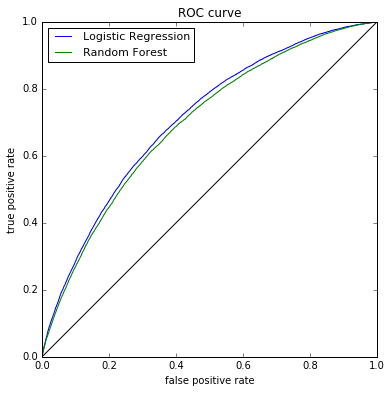

In [101]:
clfs_name = ['Logistic Regression', 'Random Forest']

clfs = [LogisticRegression(class_weight='balanced'),
        RandomForestClassifier(max_depth=15, n_estimators=10, class_weight='balanced')]

for i in range(2):
    clf = clfs[i]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:,1]
        
    print(clfs_name[i], ":")
    print("-------------------------------------------------")
    print("summary report: ")
    print(metrics.classification_report(y_test, y_pred))
    
    print("roc_auc = {}".format(metrics.roc_auc_score(y_test, y_score)))
    
    conf_mat = metrics.confusion_matrix(y_test, y_pred)
    print("confusion matrix: ")
    print(conf_mat)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)

    plt.figure(1, figsize=(6,6))
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('ROC curve')
    plt.plot(fpr, tpr, label = clfs_name[i] )
    plt.legend(loc=2, prop={'size':11})

plt.plot([0,1],[0,1], color = 'black')